# **🌌 The Year is 3200 – Humanity's Great Voyage 🌌**

In the year 3200, Earth has become uninhabitable, and humanity is forced to seek refuge among the stars. The "Spaceship Titanic" is humanity’s greatest engineering marvel—an interstellar ark designed to carry people from the dying Earth to the distant planet Trappist-1e, humanity's new home.

The Titanic Spaceship has been divided into different sectors, with people from all walks of life aboard. Some are wealthy VIPs with private cabins and luxurious accommodations. Others are everyday families and workers, hoping to rebuild their lives on Trappist-1e. The spaceship’s advanced AI manages everything—from cryosleep chambers for long-distance travel to top-tier amenities like spas and virtual reality decks.

🚨 The Catastrophe
Mid-journey, a mysterious malfunction occurs. A collision with unknown debris disrupts the ship’s systems, leading to chaos. Emergency evacuation procedures are initiated, but not everyone makes it to safety. Some passengers, frozen in cryosleep, remain oblivious to the disaster. Others try to use the ship’s services—like RoomService or VRDeck—to escape the panic. Ultimately, only some passengers survive, while others are tragically Transported into the void.

# **💾 The Dataset:**

Titanic Spaceship Dataset

PassengerId 🆔: A unique identifier for each traveler aboard.
HomePlanet 🪐: The planet where the passenger started their journey (e.g., Earth, Mars, Europa).
CryoSleep 🛌: Indicates if the passenger was in cryosleep during the journey.
Cabin 🚪: The passenger's cabin number, grouped into decks and rooms.
Destination 🌍: The planet the passenger intended to settle on.
Age 👶👨‍🦳: The passenger’s age.
VIP 👑: Whether the passenger was a VIP with special privileges.
RoomService 🍽️: Amount spent on in-room services.
FoodCourt 🍔: Amount spent at the spaceship's dining facilities.
ShoppingMall 🛍️: Amount spent on shopping.
Spa 🧖: Amount spent at the luxury spa.
VRDeck 🎮: Amount spent on virtual reality entertainment.
Name 📝: The passenger’s full name.
Transported 🚀: Indicates if the passenger survived (True/False).

# **🧩 Your Mission:**
As a data scientist, your job is to piece together what went wrong. Analyze the data to find patterns and predict which passengers were Transported and which survived.

Did being in cryosleep increase survival chances?
Were VIPs or passengers with higher spending more likely to escape?
Did younger passengers fare better than older ones?
Could cabin location play a role in survival?**

# **Importing Libraries📚💻**

In [402]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Evaluation
from sklearn.metrics import accuracy_score

# **Let’s Take a Look 👀📊**

In [403]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [404]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [405]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [406]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [407]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [408]:
df_train['HomePlanet'].value_counts()

,count
HomePlanet,
Earth,4602
Europa,2131
Mars,1759


In [409]:
print('<------Missing Values------>') # Checking for missing values in the training data
print(df_train.isnull().sum())
print("")
print('<------Missing Values----->') # Checking for missing values in the testing data
print(df_test.isnull().sum())

<------Missing Values------>
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<------Missing Values----->
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [410]:
df_test['Cabin'].value_counts()

,count
Cabin,
G/160/P,8
D/273/S,7
B/31/P,7
G/748/S,7
E/228/S,7
...,...
E/236/S,1
F/650/S,1
G/566/P,1


In [411]:
#Setting Index
df_train.set_index('PassengerId', inplace=True)  # Setting PassengerId as the index for the training data
df_test.set_index('PassengerId', inplace=True)  # Setting PassengerId as the index for the test data

# **Fighting with Null Values! ⚔️**

In [412]:
# Replacing Null Values
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())  # Replacing null Age with median value
df_test['Age'] = df_test['Age'].fillna(df_train['Age'].median())  # Replacing null Age in test set with median value from train

df_train['HomePlanet'] = df_train['HomePlanet'].fillna('Mars')  # Replacing null HomePlanet with 'Mars'
df_test['HomePlanet'] = df_test['HomePlanet'].fillna('Mars')  # Replacing null HomePlanet in test set with 'Mars'

df_train['CryoSleep'] = df_train['CryoSleep'].fillna(False)  # Replacing null CryoSleep with False
df_test['CryoSleep'] = df_test['CryoSleep'].fillna(False)  # Replacing null CryoSleep in test set with False

df_train['Cabin'] = df_train['Cabin'].fillna('T/0/P')  # Replacing null Cabin with 'T/0/P'
df_test['Cabin'] = df_test['Cabin'].fillna('T/0/P')  # Replacing null Cabin in test set with 'T/O/P'

df_train['VIP'] = df_train['VIP'].fillna('False')  # Replacing null VIP with 'False'
df_test['VIP'] = df_test['VIP'].fillna('False')  # Replacing null VIP in test set with 'False'

df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)  # Replacing null values in service columns with 0
df_test[['RoomService','FoodCourt','ShoppingMall', 'Spa', 'VRDeck']] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)  # Replacing null values in test set

df_train['Destination'] = df_train['Destination'].fillna('TRAPPIST-1e')  # Replacing null Destination with 'TRAPPIST-1e'
df_test['Destination'] = df_test['Destination'].fillna('TRAPPIST-1e')  # Replacing null Destination in test set with 'TRAPPIST-1e'

In [413]:
df_train.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [414]:
df_test.isnull().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


# **Let’s visualize the data to gain insights! 📊👀**

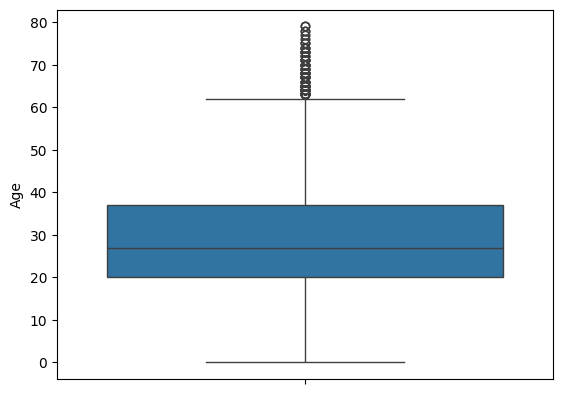

In [415]:
#Boxplot Visualization
sns.boxplot(df_train['Age'])
plt.show()

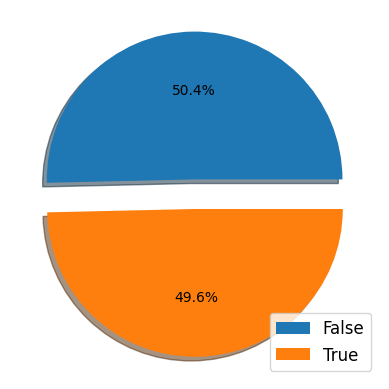

In [416]:
# Pie Chart Visualization
plt.pie(df_train.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.legend(['False', 'True'], loc='best', fontsize=12)

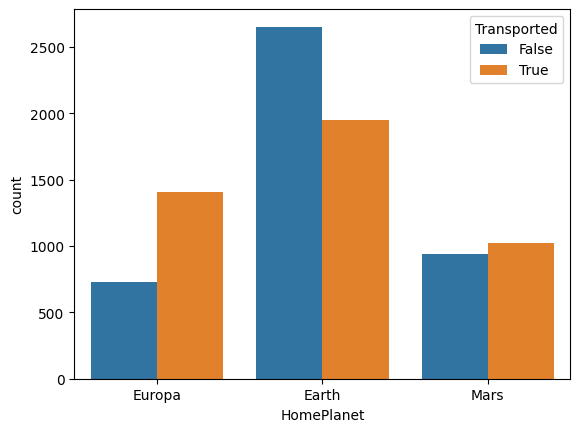

In [417]:
# Countplot Visualization
sns.countplot(x='HomePlanet' ,hue='Transported', data=df_train);

<Axes: xlabel='Destination', ylabel='count'>

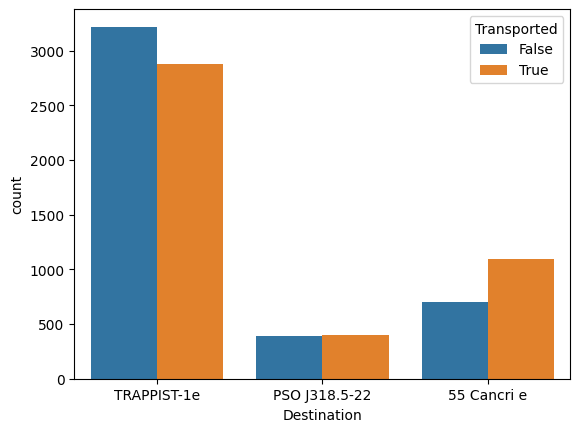

In [418]:
# Countplot Visualization
sns.countplot(x='Destination', hue='Transported', data=df_train)

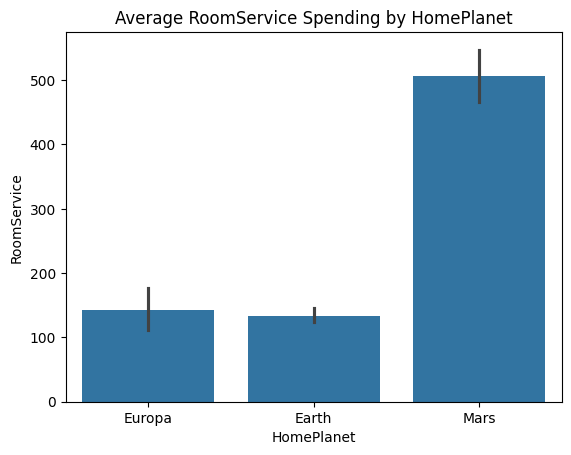

In [419]:
# Barplot Visualization
sns.barplot(x='HomePlanet', y='RoomService', data=df_train)
plt.title('Average RoomService Spending by HomePlanet')
plt.show()

# **Feature** **Enginnering🛠️📐**

In [420]:
# Dropping unnecessary columns from the training dataset
df_train.drop(['Name', 'Cabin'], axis=1, inplace=True)

df_test.drop(['Name', 'Cabin'], axis=1, inplace=True)

In [421]:
# Adding a new column 'Total_Spent' to the training dataset
df_train['Total_Spent'] = df_train['RoomService'] + df_train['FoodCourt'] + df_train['VRDeck'] + df_train['Spa']

# Adding a new column 'Total_Spent' to the testing dataset
df_test['Total_Spent'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['VRDeck'] + df_test['Spa']

# Creating a new column 'CryoSleep_VIP' in training dataset
df_train['CryoSleep_VIP'] = df_train['CryoSleep'] * df_train['VIP']

# Creating a new column 'CryoSleep_VIP' in the testing dataset
df_test['CryoSleep_VIP'] = df_test['CryoSleep'] * df_test['VIP']

In [422]:
# Importing the LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'CryoSleep_VIP']

# Initializing the LabelEncoder
label_encoders = {}

# Looping through each column in the categorical columns list
for col in categorical_columns:
    # Create a new LabelEncoder for the current column
    label_encoders[col] = LabelEncoder()

    # Fit on training data and transform both training and testing data
    # Note: We fit only on training data to avoid data leakage
    df_train[col] = label_encoders[col].fit_transform(df_train[col].astype(str))

    # Transform the test data if the column exists
    if col in df_test.columns:
        df_test[col] = label_encoders[col].transform(df_test[col].astype(str))

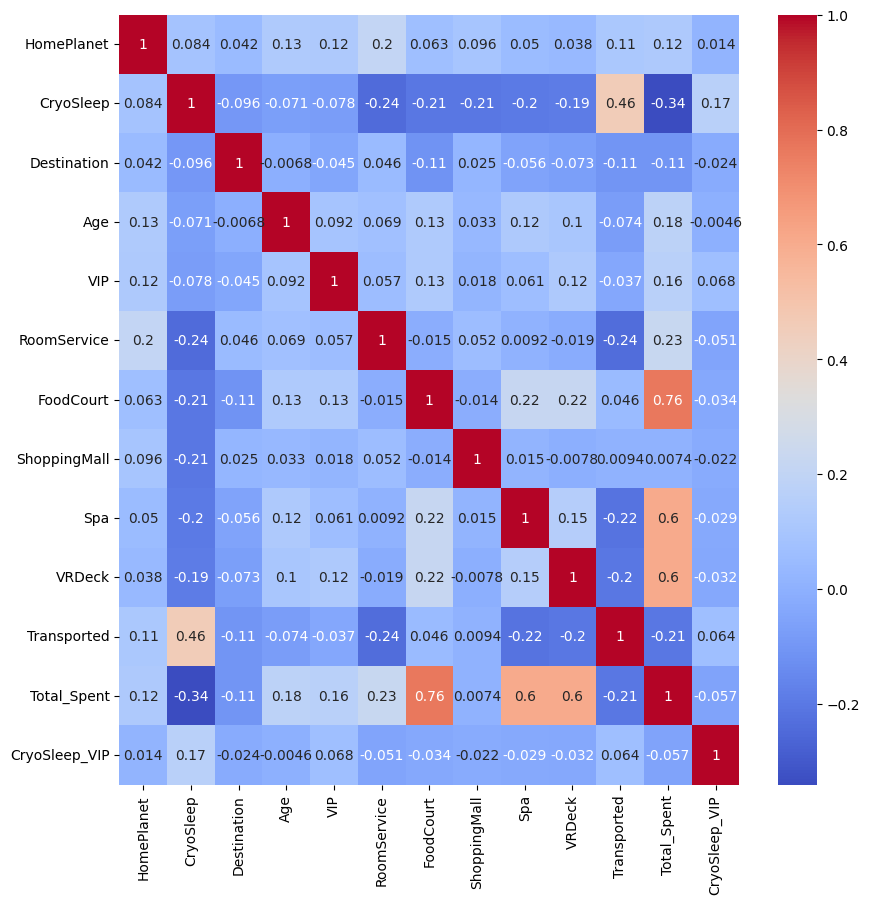

In [423]:
# Creating a heatmap
corr = df_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [424]:
# Separating the features (x) and target variable (y) from the training dataset
x = df_train.drop('Transported',axis=1)
y = df_train['Transported']

**Splitting Columns ✂️🔀**

In [425]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# **Let’s get our models ready for action! 🔥🤖**

In [426]:
# Initializing the logistic regression model
log_reg = LogisticRegression()
# Fitting (training) the logistic regression model on the training data
log_reg.fit(x_train, y_train)

LogisticRegression()

In [427]:
# Making predictions on the test dataset using the trained logistic regression model
pred_y = log_reg.predict(x_test)
pred= log_reg.predict(x_train)
print(accuracy_score(y_train.values, pred))
print(accuracy_score(y_test.values, pred_y))

0.7853034224906529
0.7722829212190915


In [428]:
# Initializing the decision tree model
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, max_features='sqrt')
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5)

In [429]:
# Making predictions on the test dataset using the trained decision tree model
pred_y = dt.predict(x_test)
pred = dt.predict(x_train)
print(accuracy_score(y_train.values, pred))
print(accuracy_score(y_test.values, pred_y))

0.8035662927811331
0.7682576193214491


In [430]:
# Initializing the Random Forest model
rf = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5, max_features='sqrt')
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)

In [431]:
# Making predictions on the test dataset using the trained Random Forest model
pred_y = rf.predict(x_test)
pred = rf.predict(x_train)
print(accuracy_score(y_train.values, pred))
print(accuracy_score(y_test.values, pred_y))

0.8318953120506184
0.7843588269120184


In [432]:
# Intializing the Gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,min_samples_leaf=5, subsample=0.8, random_state=42)
gb.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=5, random_state=42, subsample=0.8)

In [433]:
# Making predictions on the test dataset using the trained Gradient boosting model
pred_y = gb.predict(x_test)
pred = gb.predict(x_train)
print(accuracy_score(y_train.values, pred))
print(accuracy_score(y_test.values, pred_y))

0.8123382226056945
0.7797584818861415


In [434]:
# Cross validation on rf
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, x, y, cv=5, scoring='accuracy')
print(scores.mean())

0.7944346545208382


# **Looks Like Random Forest is the Most Powerful! 🌳💪**

In [435]:
rf.fit(x,y)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)

In [436]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HomePlanet     4277 non-null   int64  
 1   CryoSleep      4277 non-null   int64  
 2   Destination    4277 non-null   int64  
 3   Age            4277 non-null   float64
 4   VIP            4277 non-null   int64  
 5   RoomService    4277 non-null   float64
 6   FoodCourt      4277 non-null   float64
 7   ShoppingMall   4277 non-null   float64
 8   Spa            4277 non-null   float64
 9   VRDeck         4277 non-null   float64
 10  Total_Spent    4277 non-null   float64
 11  CryoSleep_VIP  4277 non-null   int64  
dtypes: float64(7), int64(5)
memory usage: 563.4+ KB


In [437]:
y_pred = rf.predict(df_test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)

sub.head()

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True


In [438]:
sub.to_csv('submission')

# **Thx for reading!😊**

# **Upvote👍⬆️**